In [5]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from array import array
import os

In [10]:
spec_atr = Table.read('/home/sebastian/Spectra/Spec Attributes.txt', format = 'ascii')  #to read in the Zem data


In [37]:
spec_list = spec_atr['Filename']   #to match the Zem values with their correct spec

basestring = '/home/sebastian/Spectra/spec/'

#to TRIM the speclist and ensure a good rebin

good_spec = []

good_z = []

for i in range(len(spec_list)):
    
    if spec_atr["zspec"][i] > 0.00:
        
        temp_spec = XSpectrum1D.from_file(basestring + spec_atr['Filename'][i])
        
        if temp_spec.wvmin < (1216*u.AA)*(1+spec_atr["zspec"][i]) < temp_spec.wvmax:
            
            good_z.append(spec_atr['zspec'][i])
            
            good_spec.append(XSpectrum1D.from_file(basestring + spec_atr['Filename'][i]))
        
    
    
len(good_spec)
len(good_z)

234

In [38]:
xcollate = ltsu.collate(good_spec)  #to create a single xspec list


<Quantity 3660.3400419370055 Angstrom>

In [39]:
xreb = ltsu.rebin_to_rest(xcollate, good_z ,200*u.km/u.s,grow_bad_sig=True)

xreb.wavelength

<Quantity [  769.8026194 ,  770.31617643,  770.83007607,...,
            1951.7226616 , 1953.0247108 , 1954.32762865] Angstrom>

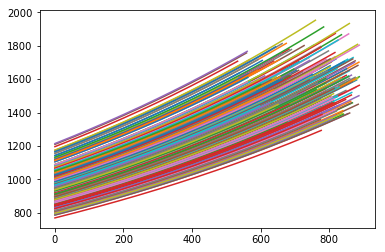

In [40]:
for spectra in xreb:
    plt.plot(spectra.wavelength)
plt.show()

#they cover Lya!

In [55]:
s2n_list = [XSpectrum1D.get_local_s2n(i,1216*u.AA) for i in xreb] #attemting to rebin but wavelenght is out of range


#s2n list to assess the spec

good_s2n = []

for i in range(len(s2n_list)):
    
    good_s2n.append(s2n_list[i][0])
